In [11]:
# Created: Dec. 17. 2018
# Use this notebook to restore saved tensorflow models.

In [12]:
import os
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [13]:
sys.path.append("../")

In [14]:
import hps_configs.mac_config as config
import core.tools.rnn_prepare as rnn_prepare
import constants

In [15]:
data_param = config.dp_config

In [16]:
DIR = "/Users/tianyudu/Desktop/sample_model/saved_models/"
META = "num_neurons=(64, 64, 128)-learning_rate=0.1.meta"
FILE_DIR = constants.DATA_DIR["a"]

In [17]:
tf.reset_default_graph()

In [18]:
!cd /Users/tianyudu/Downloads/sample_model/saved_models/
!pwd

/Users/tianyudu/Documents/Academics/EconForecasting/AnnEconForecast/notebooks


In [19]:
prepared_df = rnn_prepare.prepare_dataset(
    file_dir=FILE_DIR,
    periods=data_param["PERIODS"],
    order=data_param["ORDER"],
    remove=None,
    verbose=False
)
(X_train, X_val, X_test,
 y_train, y_val, y_test) = rnn_prepare.generate_splited_dataset(
    raw=prepared_df,
    train_ratio=data_param["TRAIN_RATIO"],
    val_ratio=data_param["VAL_RATIO"],
    lags=data_param["LAGS"]
)
data_collection = {
    "X_train": X_train,
    "X_val": X_val,
    "X_test": X_test,
    "y_train": y_train,
    "y_val": y_val,
    "y_test": y_test
}

Dataset loaded.    
	Index type: datetime64[ns]    
	Data type: float64
StandardScaler applied, scaling based on the first 679 observations.
Total 836 observations generated.
Note: shape format: (num_obs, time_steps, num_inputs/outputs)
X shape = (836, 12, 1), y shape = (836, 1, 1)
Training and testing set generated,        
X_train shape: (668, 12, 1)        
y_train shape: (668, 1)        
X_test shape: (84, 12, 1)        
y_test shape: (84, 1)        
X_validation shape: (84, 12, 1)        
y_validation shape: (84, 1)


In [22]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph(DIR + META)
    new_saver.restore(sess, tf.train.latest_checkpoint(DIR))
#     print(sess.run("DATA_FEED/Feature_X"))
    graph = tf.get_default_graph()
    X = graph.get_tensor_by_name("DATA_FEED/FEATURE:0")
    pred = graph.get_tensor_by_name("OUTPUT_LAYER/PREDICTION:0")
#     print(sess.run("OUTPUT_LAYER/Prediction"))
    def make_pred(feed_X):
        return pred.eval(feed_dict={X: feed_X})
    p_train = make_pred(X_train)
    p_val = make_pred(X_val)
    p_test = make_pred(X_test)

INFO:tensorflow:Restoring parameters from /Users/tianyudu/Desktop/sample_model/saved_models/num_neurons=(64, 64, 128)-learning_rate=0.1


In [23]:
    # sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# imported_meta = tf.train.import_meta_graph(DIR + META)
# imported_meta.restore(sess, tf.train.latest_checkpoint(DIR))

In [24]:
trainable_var = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)

In [25]:
tf.get_collection("Prediction")

[]

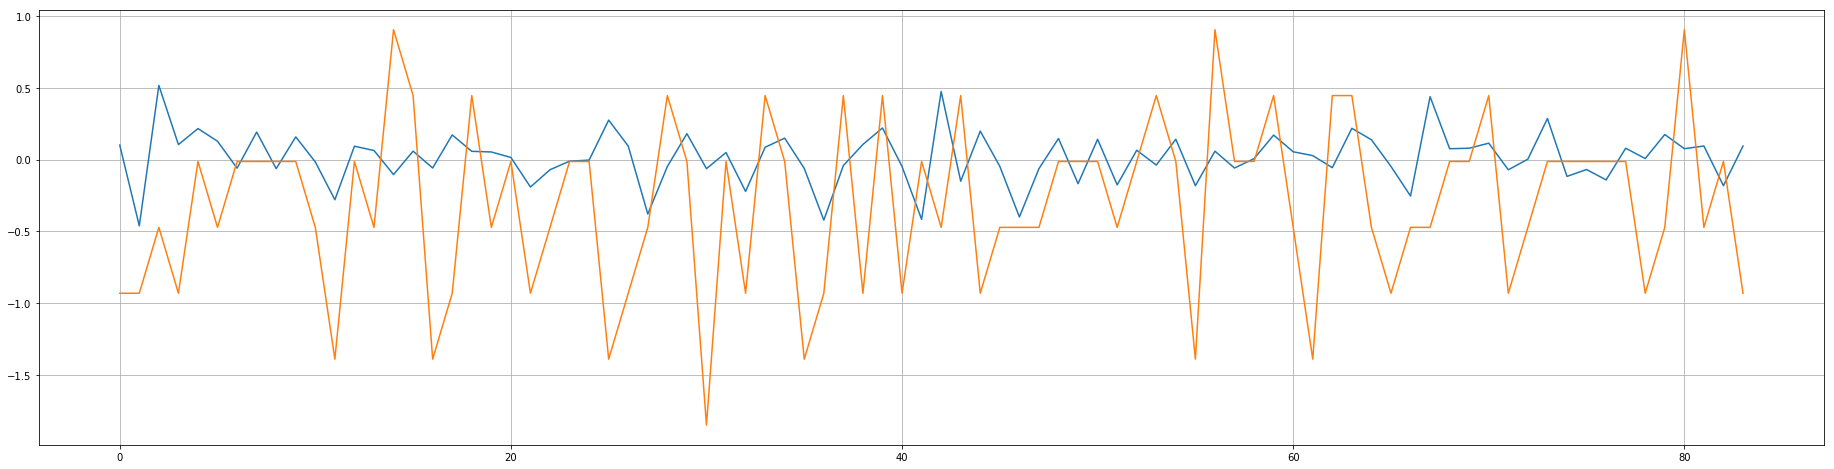

In [26]:
plt.close()
plt.figure(figsize=(32,8))
plt.plot(p_test)
plt.plot(y_test)
plt.grid(True)

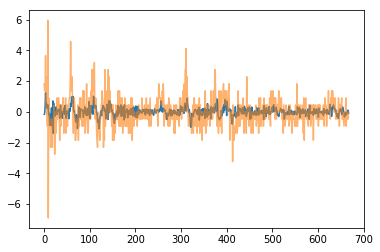

In [26]:
plt.close()
plt.plot(p_train)
plt.plot(y_train, alpha=0.6)